In [129]:
# install missing packages (run this cell before using the imports)
#%pip install scikit-learn

#import libraries
import pandas as pd #loading datasets
import numpy as np #perform numerical calculations
import matplotlib.pyplot as plt #python visualization
import seaborn as sns #statistical visualization
from statsmodels.stats.outliers_influence import variance_inflation_factor #detect multicollinearity
from scipy import stats #statistical inferencing
import statsmodels.api as sm
from statsmodels.formula.api import ols #linear regression model 
from sklearn.preprocessing import LabelEncoder, StandardScaler #preprocessing data before ml
from sklearn.preprocessing import MinMaxScaler #normalizing data
from sklearn.model_selection import train_test_split #splitting data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso #linear regression models
from sklearn.ensemble import RandomForestRegressor #ensembling model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error #model evaluation metrics
#we will add adaboost, catboost,xgboost, light gbm

In [98]:
#load a dataset
house_prices_data= pd.read_csv(r'house_prices_dataset.csv') 
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,zipcode,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,98001,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,98003,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,98002,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,98004,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,98005,47.701306,-122.416623,1314784.23


In [99]:
house_prices_data["waterfront"].value_counts()

waterfront
0    893
1    107
Name: count, dtype: int64

In [100]:
house_prices_data["view"].value_counts()

view
1    265
0    259
3    250
2    226
Name: count, dtype: int64

In [101]:
house_prices_data["condition"].value_counts()

condition
5    216
2    207
4    199
1    190
3    188
Name: count, dtype: int64

In [102]:
house_prices_data["grade"].value_counts()

grade
12    111
1      95
3      91
10     90
8      86
4      85
9      80
5      80
6      76
11     75
7      72
2      59
Name: count, dtype: int64

In [103]:
#drop zip code column
house_prices_data= house_prices_data.drop(['zipcode'], axis=1)
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623,1314784.23


In [104]:
house_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        1000 non-null   int64  
 1   bathrooms       1000 non-null   int64  
 2   sqft_living     1000 non-null   int64  
 3   sqft_lot        1000 non-null   int64  
 4   floors          1000 non-null   int64  
 5   waterfront      1000 non-null   int64  
 6   view            1000 non-null   int64  
 7   condition       1000 non-null   int64  
 8   grade           1000 non-null   int64  
 9   year_built      1000 non-null   int64  
 10  year_renovated  1000 non-null   int64  
 11  lat             1000 non-null   float64
 12  long            1000 non-null   float64
 13  price           1000 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 109.5 KB


####Exploratory Data Analysis (EDA)

Price distribution
does the number of floors influence the price?


In [105]:
house_prices_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2.988000,2.038000,2792.998000,5447.602000,1.501000,0.107000,1.467000,3.044000,6.651000,1985.746000,431.076000,47.443683,-122.009919,8.358796e+05
std,1.412746,0.819285,1288.747969,2614.572404,0.500249,0.309268,1.126135,1.424814,3.548773,20.809385,819.312098,0.198316,0.292534,3.271162e+05
min,1.000000,1.000000,600.000000,1001.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1950.000000,0.000000,47.100252,-122.497067,2.075845e+05
25%,2.000000,1.000000,1652.750000,3103.500000,1.000000,0.000000,0.000000,2.000000,4.000000,1968.000000,0.000000,47.275159,-122.259953,5.527969e+05
50%,3.000000,2.000000,2787.500000,5464.500000,2.000000,0.000000,1.000000,3.000000,7.000000,1986.000000,0.000000,47.450923,-122.024822,8.460296e+05
75%,4.000000,3.000000,3921.500000,7754.500000,2.000000,0.000000,2.250000,4.000000,10.000000,2004.000000,0.000000,47.609755,-121.748543,1.131182e+06
max,5.000000,3.000000,4996.000000,9992.000000,2.000000,1.000000,3.000000,5.000000,12.000000,2021.000000,2021.000000,47.798749,-121.500636,1.476859e+06


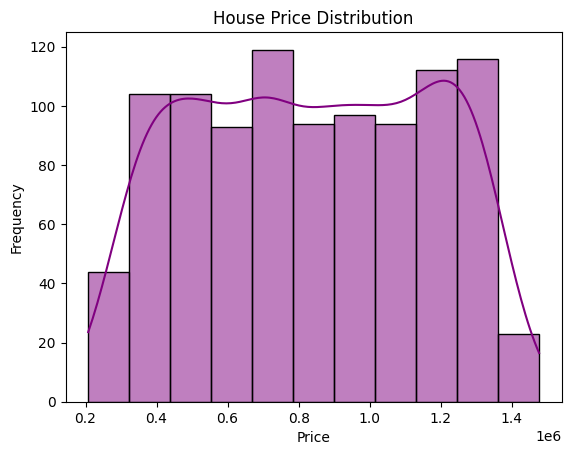

In [106]:
#price distribution
# pass the DataFrame and specify the column name (data must be a DataFrame or mapping)
sns.histplot(x='price', data=house_prices_data,color='purple',kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/var/folders/rh/hmsgqjcd7ql0d_4ksg2_k9t40000gn/T/ipykernel_29953/4089767288.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='floors', y='price', data=house_prices_data, ci=None)


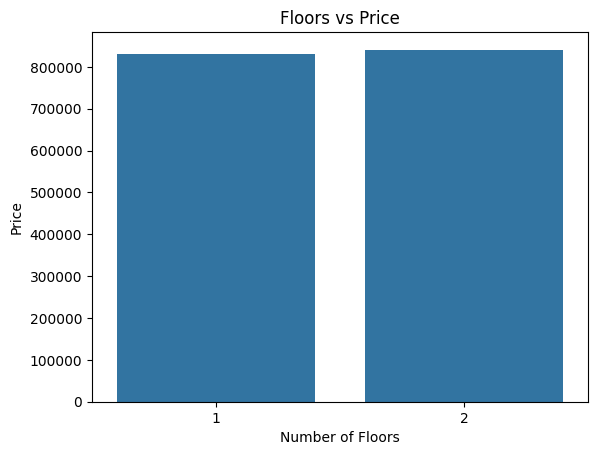

In [107]:
# use seaborn's barplot (accepts x, y, data) to plot average price per floor
sns.barplot(x='floors', y='price', data=house_prices_data, ci=None)
plt.title('Floors vs Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()

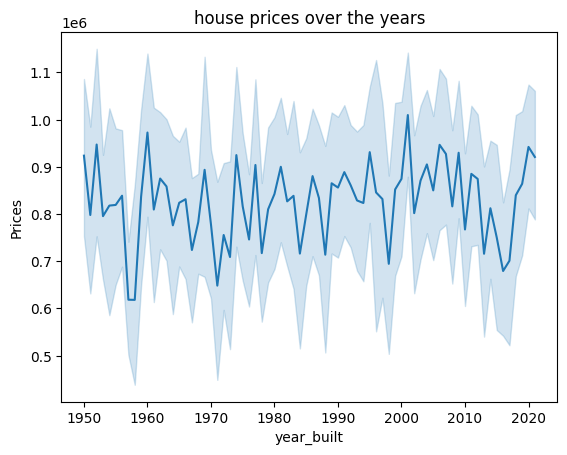

In [108]:
sns.lineplot(data=house_prices_data, x="year_built", y="price")
plt.title("house prices over the years")
plt.xlabel("year_built")
plt.ylabel("Prices")
plt.show()

In [109]:
#correlation analysis
#relationship between the independent adnd dependent variables
#interpreting correlation
# perfect corelation = 1
# strong correlation = 0.5 to 1
#strong negative correlation = -0.5 to -1
#weak correlation = 0.1 to 0.5
#weak negative correlation = -0.1 to -0.5

#no correlation = 0
#pearson correlation
correlations= house_prices_data.corr()
print(correlations)

                bedrooms  bathrooms  sqft_living  ...       lat      long     price
bedrooms        1.000000  -0.003930    -0.020278  ...  0.036425 -0.014820  0.051959
bathrooms      -0.003930   1.000000     0.030190  ... -0.012870 -0.009914  0.060793
sqft_living    -0.020278   0.030190     1.000000  ... -0.038860 -0.017699  0.986325
sqft_lot       -0.028367   0.002061    -0.014612  ... -0.019825  0.135227 -0.020945
floors         -0.015563   0.043870     0.008787  ... -0.021462  0.012312  0.015929
waterfront      0.044181   0.051097    -0.017256  ...  0.016522  0.031468  0.080397
view            0.009189   0.048013     0.055540  ...  0.003718 -0.016395  0.065690
condition      -0.016148   0.049160     0.024721  ... -0.002600 -0.000478  0.064545
grade           0.015536  -0.011960     0.004750  ...  0.039896  0.005800  0.087347
year_built     -0.028739   0.012309     0.040945  ...  0.008784 -0.025812  0.036437
year_renovated -0.049568  -0.018157    -0.024732  ...  0.013257  0.040492 -0

<Axes: >

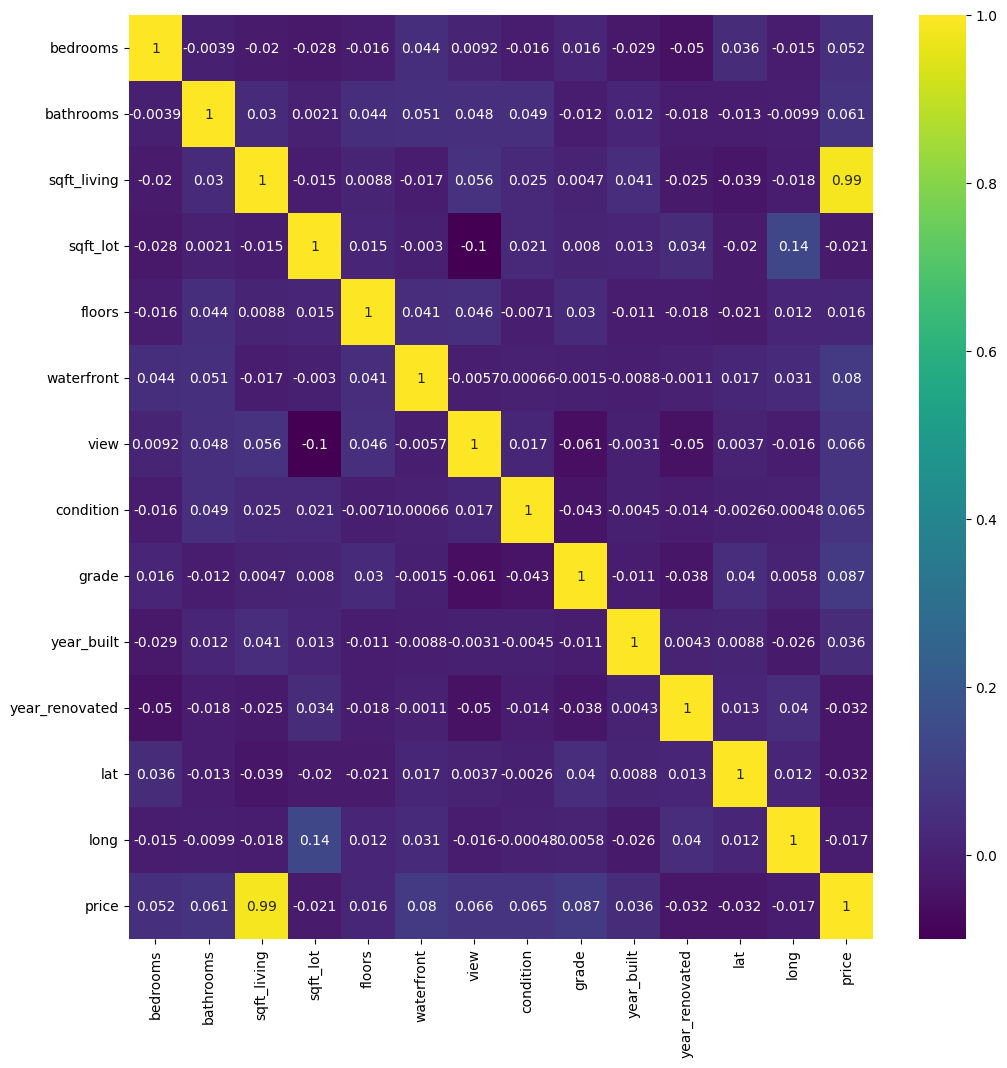

In [110]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(correlations, annot=True, cmap='viridis')

In [111]:
#extract the independent and dependent variables
y= house_prices_data['price']
x= house_prices_data.drop(['price'], axis=1)

In [112]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623


In [113]:
# Variance Inflation Factor
# use the numeric-only dataframe (x_numeric) to avoid non-numeric dtypes (e.g. datetime)
x_vif = add_constant(x_numeric)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i)
                   for i in range(x_vif.shape[1])]

print(vif_data)

                   Feature            VIF
0                 bedrooms       1.006126
1                bathrooms       1.010230
2              sqft_living       1.008683
3                 sqft_lot       1.031122
4                   floors       1.008089
5               waterfront       1.008007
6                     view       1.021836
7                condition       1.005825
8                    grade       1.008833
9               year_built       1.004024
10                     lat       1.005990
11                    long       1.021304
12   year_since_renovation            NaN
13  years since renovation  244986.439558


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


####ANOVA (F-statistic)
-hypothesis testing
-checking for significance of the independent variables with relation to the dependent variable
-OLS to fit our model and get the F-statistic

In [114]:
# use Patsy's categorical operator 'C' (capital C) and correct column name 'year_renovated'
formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + year_built + year_renovated + lat + C(waterfront) + C(view) + C(condition) + C(grade)"
lm = ols(formula, data=house_prices_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq     df              F         PR(>F)
C(waterfront)   9.166885e+11    1.0    2422.565237  3.355631e-266
C(view)         1.778554e+10    3.0      15.667488   5.883908e-10
C(condition)    2.041691e+11    4.0     134.891242   1.112040e-91
C(grade)        7.618583e+11   11.0     183.035443  5.880710e-228
bedrooms        4.706588e+11    1.0    1243.826626  4.059315e-176
bathrooms       6.155832e+10    1.0     162.682355   1.458921e-34
sqft_living     1.014566e+14    1.0  268122.917833   0.000000e+00
sqft_lot        1.977391e+09    1.0       5.225722   2.246966e-02
floors          3.831050e+07    1.0       0.101245   7.504096e-01
year_built      4.572571e+06    1.0       0.012084   9.124894e-01
year_renovated  1.098546e+08    1.0       0.290317   5.901411e-01
lat             1.175944e+08    1.0       0.310771   5.773358e-01
Residual        3.678007e+11  972.0            NaN            NaN


In [115]:
house_prices_data["year_renovated"]


0         0
1         0
2      1962
3      1962
4         0
       ... 
995       0
996    2005
997       0
998       0
999       0
Name: year_renovated, Length: 1000, dtype: int64

In [116]:
house_prices_data["year_renovated"]=pd.to_datetime(house_prices_data["year_renovated"])
house_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bedrooms        1000 non-null   int64         
 1   bathrooms       1000 non-null   int64         
 2   sqft_living     1000 non-null   int64         
 3   sqft_lot        1000 non-null   int64         
 4   floors          1000 non-null   int64         
 5   waterfront      1000 non-null   int64         
 6   view            1000 non-null   int64         
 7   condition       1000 non-null   int64         
 8   grade           1000 non-null   int64         
 9   year_built      1000 non-null   int64         
 10  year_renovated  1000 non-null   datetime64[ns]
 11  lat             1000 non-null   float64       
 12  long            1000 non-null   float64       
 13  price           1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage:

In [117]:
# feature engineering
current_year = pd.Timestamp.now().year

# extract year from datetime column (works when year_renovated is datetime64[ns])
renov_year = house_prices_data["year_renovated"].dt.year

# compute years since renovation; treat missing/zero years as 0 (no renovation)
house_prices_data["years since renovation"] = np.where(renov_year > 0, current_year - renov_year, 0).astype(int)

house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price,years since renovation
0,3,1,2803,1153,1,0,0,3,9,2003,1970-01-01 00:00:00.000000000,47.660671,-121.785347,835016.23,55
1,5,3,783,9762,1,0,2,4,4,2019,1970-01-01 00:00:00.000000000,47.681937,-122.151515,326073.09,55
2,3,3,3412,2842,2,0,3,4,9,1961,1970-01-01 00:00:00.000001962,47.182798,-121.792089,1025404.09,55
3,2,3,2222,9020,2,1,2,4,4,2008,1970-01-01 00:00:00.000001962,47.440995,-121.871224,758764.79,55
4,4,1,4713,1584,2,0,3,4,5,1987,1970-01-01 00:00:00.000000000,47.701306,-122.416623,1314784.23,55


In [118]:
house_prices_data["year_renovated"].value_counts()


year_renovated
1970-01-01 00:00:00.000000000    783
1970-01-01 00:00:00.000001970      8
1970-01-01 00:00:00.000001993      8
1970-01-01 00:00:00.000001998      6
1970-01-01 00:00:00.000001962      6
                                ... 
1970-01-01 00:00:00.000002010      1
1970-01-01 00:00:00.000002013      1
1970-01-01 00:00:00.000001956      1
1970-01-01 00:00:00.000001954      1
1970-01-01 00:00:00.000001987      1
Name: count, Length: 70, dtype: int64

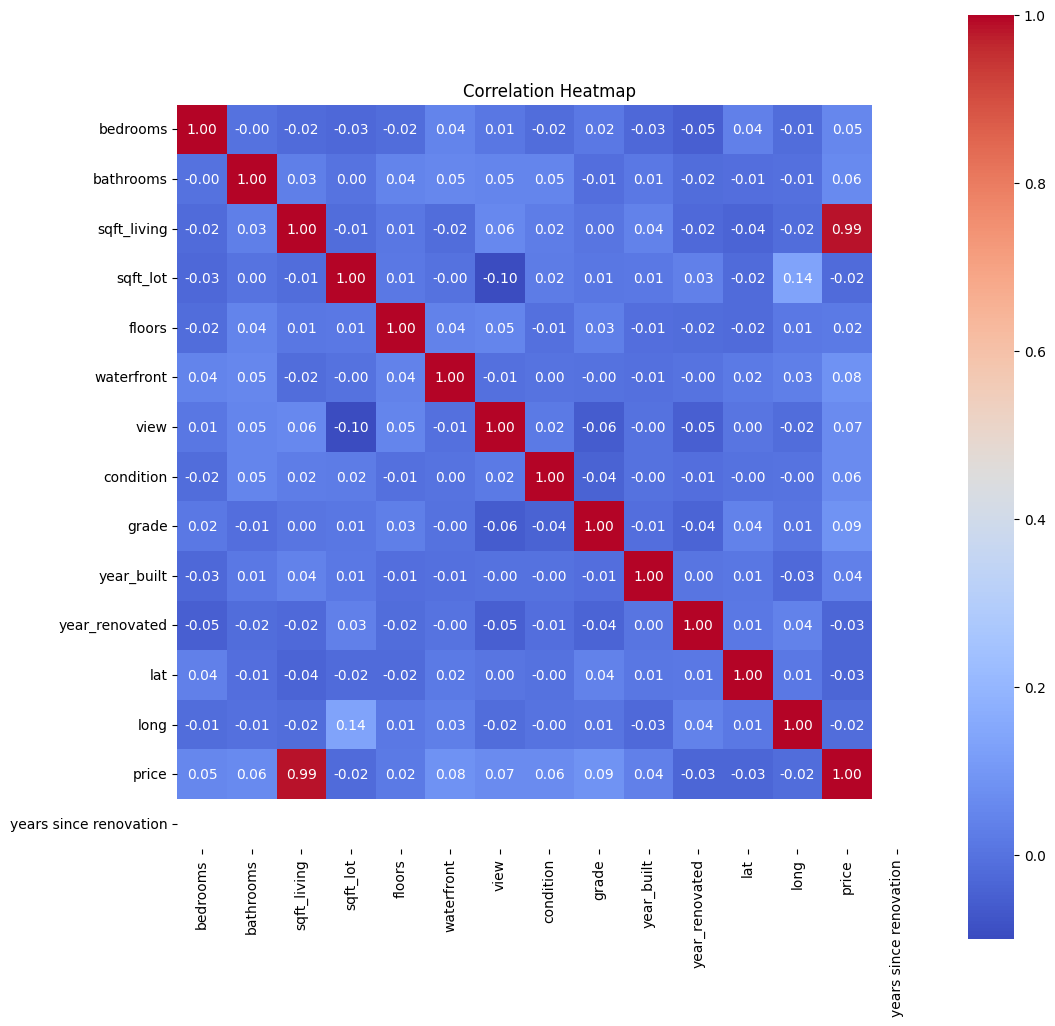

In [119]:
correlarions1= house_prices_data.corr()
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(correlarions1, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [120]:
#variance inflation factor (VIF)
#can be used to detect multicollinearity
x = house_prices_data.drop(['price'], axis=1)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i)
                   for i in range(x_vif.shape[1])]

print(vif_data)

                   Feature            VIF
0                 bedrooms       1.006126
1                bathrooms       1.010230
2              sqft_living       1.008683
3                 sqft_lot       1.031122
4                   floors       1.008089
5               waterfront       1.008007
6                     view       1.021836
7                condition       1.005825
8                    grade       1.008833
9               year_built       1.004024
10                     lat       1.005990
11                    long       1.021304
12   year_since_renovation            NaN
13  years since renovation  244986.439558


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


/var/folders/rh/hmsgqjcd7ql0d_4ksg2_k9t40000gn/T/ipykernel_29953/71638438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')


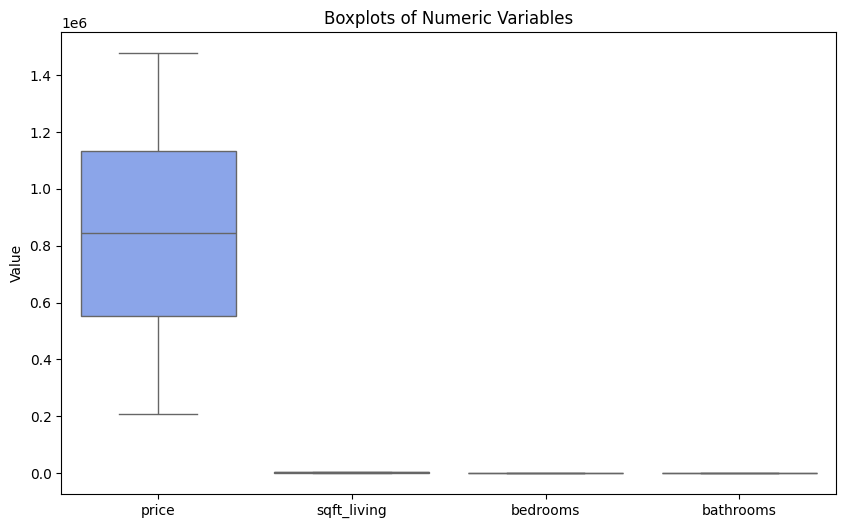

In [121]:
numeric_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms']

# Melt data into long format
house_prices_melted = house_prices_data[numeric_cols].melt(var_name='Variable', value_name='Value')

# Plot all boxplots in one chart
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')
plt.title('Boxplots of Numeric Variables')
plt.xlabel('')
plt.ylabel('Value')
plt.show()

/var/folders/rh/hmsgqjcd7ql0d_4ksg2_k9t40000gn/T/ipykernel_29953/3651659073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='Scaled Value', data=scaled_melted, palette='viridis')


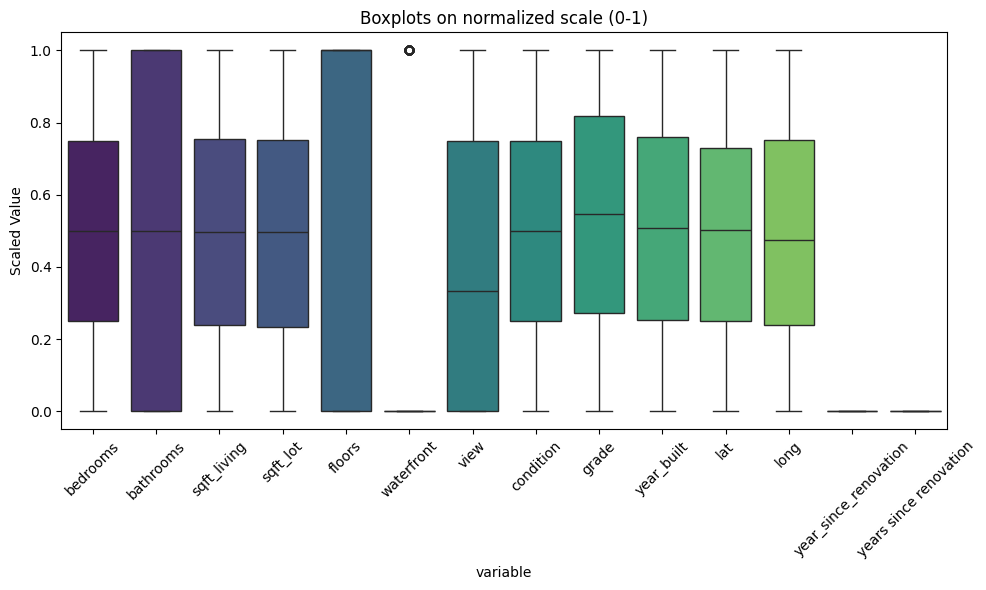

In [132]:
# Scale numeric-only dataframe to avoid dtype promotion errors (datetime cannot be cast to float)
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(x_numeric)  # use x_numeric (no datetime dtypes)
scaled_df = pd.DataFrame(data_scaled, columns=x_numeric.columns)
scaled_melted = scaled_df.melt(var_name='variable', value_name='Scaled Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='Scaled Value', data=scaled_melted, palette='viridis')
plt.title('Boxplots on normalized scale (0-1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
price_normalized =np.log(y)
y_transformed =pd.Series(price_normalized)
print(y_transformed)

0      13.635206
1      12.694877
2      13.840597
3      13.539447
4      14.089183
         ...    
995    13.453856
996    13.994396
997    13.443744
998    12.987000
999    12.420902
Name: price, Length: 1000, dtype: float64


In [135]:
model = sm.OLS(price_normalized,scaled_df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2359.
Date:                Wed, 29 Oct 2025   Prob (F-statistic):                        0.00
Time:                        12:31:42   Log-Likelihood:                         -2330.8
No. Observations:                1000   AIC:                                      4686.
Df Residuals:                     988   BIC:                                      4745.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
